In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 6, 4
from sklearn import svm
from sklearn.svm import SVC
import math
import pandas as pd
from sklearn.naive_bayes import GaussianNB

## Task 1 (5+5+5+5+5=25 pts)

### Consider the dataset HW2_task1.csv, a binary classification problem with two real-valued input attributes.  As you can see from the plot, the dataset is linearly separable. Train a linear SVM (setting C=100000 just to emphasize that no slack variables are allowed) and  answer the following five questions: 

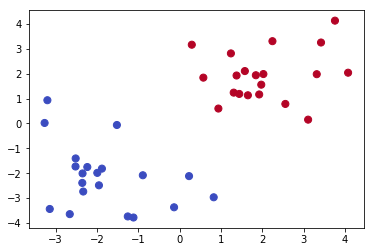

In [156]:
# Data
data1 = pd.read_csv('HW2_task1.csv')
X = data1.iloc[:, :2]
Y = data1.iloc[:, 2]
plt.gca()
plt.scatter(
    X.iloc[:, 0], X.iloc[:, 1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))
plt.show()

#### a. Report the separating hyperplane (line).

#### b. List the support vectors.

#### c. Calculate the upper and lower hyperplanes (lines) of the margin.

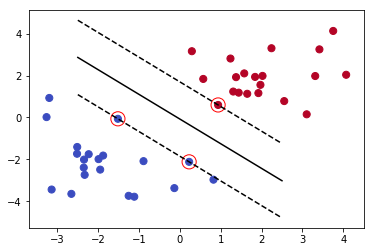

In [157]:
clf = svm.SVC(kernel='linear', C=100000)

clf.fit(X, Y)

w = clf.coef_[0]
a = -w[0] / w[1]
x1 = np.linspace(-2.5, 2.5)
x2 = a * x1 - (clf.intercept_[0]) / w[1]

b = clf.support_vectors_[0]
x2_down = a * x1 + (b[1] - a * b[0])

b = clf.support_vectors_[-1]
x2_up = a * x1 + (b[1] - a * b[0])

plt.gca()
plt.plot(x1, x2, 'k-')
plt.plot(x1, x2_down, 'k--')
plt.plot(x1, x2_up, 'k--')

plt.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=200,
    facecolors='none',
    edgecolors='red')
plt.scatter(
    X.iloc[:, 0], X.iloc[:, 1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))

plt.axis('tight')
plt.show()

#### d. Compute the width of the margin.

In [158]:
# your code here
w = clf.dual_coef_.dot(clf.support_vectors_)
margin = 2 / np.sqrt((w**2).sum())

In [159]:
margin

2.2977993504276433

#### e. What would you expect to happen to the margin if the constant C was made very small?

### <font color=blue size=4> There might be overfitting </font>

## Task 2 (4+8+8=20 pts)

### Given the dataset provided below, answer the following two questions:

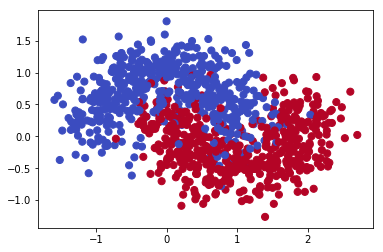

In [164]:
# Data
data2 = pd.read_csv('HW2_task2.csv')
X = data2.iloc[:, :2]
Y = data2.iloc[:, 2]

plt.gca()
plt.scatter(
    X.iloc[:, 0], X.iloc[:, 1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))
plt.show()

# Generate training (X_train, Y_train) and testing (X_test, Y_test) datasets for out of sample test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.33, random_state=1)

### a. Train a polynomial SVM using the training set. Use the default arguments, and report both in-sample (training set) and out-of-sample (test set) classification accuracy.

In [166]:
clf = svm.SVC(kernel='poly')
clf.fit(X_train, Y_train)

correct = 1.0 * (clf.predict(X_test) == Y_test).sum() / len(Y_test)

print("In sample, we successfully predict {} percent of the data".format(
    (clf.predict(X_train) == Y_train).sum() * 100 / len(Y_train)))
print("Out of sample, we successfully predict {} percent of the data".format(
    (np.mean(correct)) * 100))

In sample, we successfully predict 81.34328358208955 percent of the data
Out of sample, we successfully predict 82.72727272727273 percent of the data


### Next we will use the validation subset in order to pick the optimal parameters for the polynomial model.

### b. Try polynomials of degree 1,2,3,4. For each degree, consider a variety of regularization constants from the range C=[math.exp(i) for i in np.linspace(-10,2*degree,200)] in order to evaluate the classifier performance over the validation set defined below.  Plot the graph of "Accuracy vs log(C)" for each degree.


In [167]:
# Next we generate validation data (X_vali, Y_vali) from the training dataset.
# Denote the remaining training data by (X_train_1, Y_train_1).
X_train_1, X_vali, Y_train_1, Y_vali = train_test_split(
    X_train, Y_train, test_size=0.33, random_state=99)
OS = {}
for degree in range(1, 5):
    for C in [math.exp(i) for i in np.linspace(-10, 2 * degree, 200)]:
        clf = svm.SVC(kernel='poly', degree=degree, C=C)
        clf.fit(X_train_1, Y_train_1)
        OS.setdefault(degree, []).append(
            np.mean(1.0 *
                    (clf.predict(X_vali) == Y_vali).sum() / len(Y_vali)) * 100)
# your code here

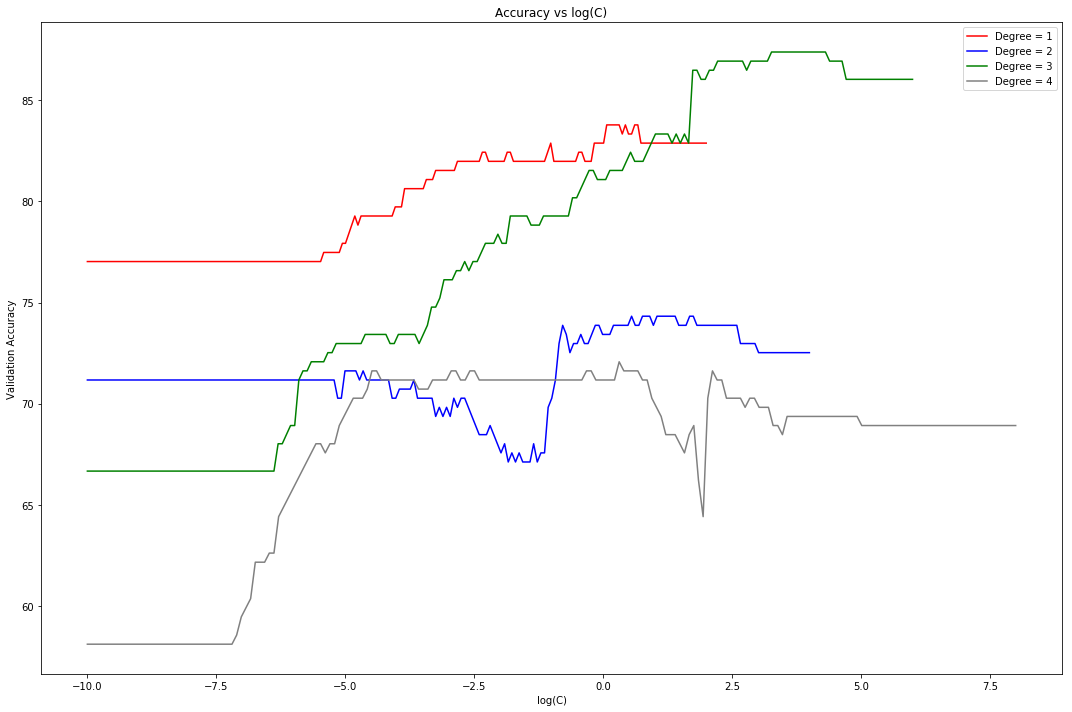

In [163]:
C = ['r', 'b', 'g', 'grey', 'orange']
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
for label in range(1, 5):
    ax.plot(
        [i for i in np.linspace(-10, 2 * label, 200)],
        OS[label],
        c=C[label - 1],
        label='Degree = {}'.format(label))
ax.legend()
ax.set_xlabel('log(C)')
ax.set_ylabel('Validation Accuracy')
ax.set_title('Accuracy vs log(C)')
plt.tight_layout()

### c. Choose the optimal degree and the optimal regularization constant C based on these graphs.  Use the optimal degree and C to compute and report the final out-of-sample accuracy of the best classification model selected. 

In [186]:
# your code here
clf = svm.SVC(kernel='poly', degree=3, C=25)
clf.fit(X_train, Y_train)
print(
    'The final out-of-sample accuracy of the best classification model selected is {} percent'.
    format(
        np.mean(1.0 *
                (clf.predict(X_test) == Y_test).sum() / len(Y_test)) * 100))

The final out-of-sample accuracy of the best classification model selected is 89.0909090909091 percent


## Task 3 (5+5=10pts).

### This task is to be done by hand rather than using Python.

Assume you have a data set as below. It contains records of cars with three features: the type of the car (sports or SUV), the color of the car (red or yellow), and the origin of the car (domestic or imported). And the labels for the data are yes (car was stolen) and no (car was not stolen).

CarType,Color,Origin,Stolen?

sports,red,domestic,yes

sports,red,domestic,yes

sports,red,domestic,yes

SUV,red,domestic,no

SUV,red,imported,yes

SUV,yellow,imported,no

SUV,yellow,imported,yes

SUV,yellow,domestic,no

sports,yellow,imported,no

sports,red,imported,yes


### a) Calculate the following sample probabilities:  
</br>
<font size=3 color=blue>
P(Yes) = 0.6  

P(No) = 0.4  

P(Red|Yes) = $^5/_6$ = 0.8333  

P(SUV|Yes) = $^2/_6$ = 0.3333  

P(Domestic|Yes) = 0.5  

P(Red|No) = 0.25  

P(SUV|No) = 0.75  

P(Domestic|No) = 0.5  
</font>

### b) Using naive Bayes classification, what is the probability that a red, domestic SUV will be stolen?
</br>
<font size = 3 color = blue>P(Yes|Red,SUV,Domestic) = $\frac{(^5_6*^2_6*0.5)*0.6}{(0.5*0.25*0.75)*0.4+(^5_6*^2_6*0.5)*0.6}$ = 0.6897</font>
</br>

## Task 4 (4+2+2+2=10pts)

Consider the following problem involving Gaussian Naive Bayes classification.  We use eight factors to predict if people have diabetes or not. The variables are:

y: The label (0 - no diabetes, 1 - diabetes)

t_pre: Number of times pregnant

glu: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

blood_p: Diastolic blood pressure (mm Hg)

triceps: Triceps skin fold thickness (mm)

serum: 2-Hour serum insulin (mu U/ml)

b_m: Body mass index (weight in kg/(height in m)^2)

pedigree_f: Diabetes pedigree function

age: Age (years)

### Using the data provided below, learn a Naive Bayes classifier from the training data and answer the following questions: 

In [11]:
# Training data
data_train = pd.read_csv("HW2_task4_train.csv")
y_train = data_train.iloc[:, 1]
X_train = data_train.iloc[:, 2:]

# Testing data
data_test = pd.read_csv("HW2_task4_test.csv")
y_test = data_test.iloc[:, 1]
X_test = data_test.iloc[:, 2:]

print(X_train.head())

   t_pre    glu  blood_p  triceps  serum   b_m  pedigree_f   age
0    3.0  158.0     64.0     13.0  387.0  31.2       0.295  24.0
1    0.0   84.0     64.0     22.0   66.0  35.8       0.545  21.0
2    9.0  120.0     72.0     22.0   56.0  20.8       0.733  48.0
3    4.0  110.0     76.0     20.0  100.0  28.4       0.118  27.0
4    2.0  100.0     66.0     20.0   90.0  32.9       0.867  28.0


### a) What is the prediction accuracy for Naive Bayes, both in sample (on the training data) and out of sample (on the test data)?

In [30]:
# your code here
gnb = GaussianNB()
trained_model = gnb.fit(X_train, y_train)
y_pred_train = trained_model.predict_proba(X_train)[:, 1]
y_pred_test = trained_model.predict_proba(X_test)[:, 1]

# measure accuracy for the binary prediction task
print('In sample prediction accuracy:',
      1.0 * sum((y_pred_train > 0.5) == y_train) / len(y_train))
print('Out of sample prediction accuracy:',
      1.0 * sum((y_pred_test > 0.5) == y_test) / len(y_test))

In sample prediction accuracy: 0.7584745762711864
Out of sample prediction accuracy: 0.7911392405063291


### b) What is the prior probability of diabetes, learned from the training data?

In [40]:
# your code here
print('The prior probability of no diabetes is {}, of diabetes is {}'.format(
    gnb.class_prior_[0], gnb.class_prior_[1]))

The prior probability of no diabetes is 0.6991525423728814, of diabetes is 0.3008474576271186


### c) What is the mean and variance of each input variable for patients with diabetes?

In [57]:
# your code here
print('The mean of each input variable for patients with diabetes are:')
print(
    pd.DataFrame({
        'feature': X_train.columns,
        'variance': np.array(gnb.theta_[1, :])
    }))
print('\nThe variable of each input variable for patients with diabetes are:')
print(
    pd.DataFrame({
        'feature': X_train.columns,
        'variance': np.array(gnb.sigma_[1, :])
    }))

The mean of each input variable for patients with diabetes are:
      feature    variance
0       t_pre    4.070423
1         glu  144.140845
2     blood_p   74.563380
3     triceps   33.478873
4       serum  209.211268
5         b_m   35.223944
6  pedigree_f    0.639042
7         age   35.788732

The variable of each input variable for patients with diabetes are:
      feature      variance
0       t_pre     12.206320
1         glu    924.768907
2     blood_p    187.738953
3     triceps     93.967876
4       serum  15882.053970
5         b_m     38.617044
6  pedigree_f      0.190055
7         age    103.856786


### d) What is the mean and variance of each input variable for patients without diabetes?

In [58]:
# your code here
# your code here
print('The mean of each input variable for patients without diabetes are:')
print(
    pd.DataFrame({
        'feature': X_train.columns,
        'variance': np.array(gnb.theta_[0, :])
    }))
print(
    '\nThe variable of each input variable for patients withput diabetes are:')
print(
    pd.DataFrame({
        'feature': X_train.columns,
        'variance': np.array(gnb.sigma_[0, :])
    }))

The mean of each input variable for patients without diabetes are:
      feature    variance
0       t_pre    2.690909
1         glu  111.466667
2     blood_p   69.206061
3     triceps   27.200000
4       serum  127.006061
5         b_m   31.709091
6  pedigree_f    0.468685
7         age   28.393939

The variable of each input variable for patients withput diabetes are:
      feature     variance
0       t_pre     6.771141
1         glu   605.994355
2     blood_p   136.369672
3     triceps   108.269103
4       serum  8318.987854
5         b_m    39.921929
6  pedigree_f     0.084614
7         age    72.444824


## Task 5 (10+15=25 pts)

We have an artificial data set split, where the training set contains both labeled and unlabeled data. Column 'y' is the label, and columns '0','1','2' are categorical variables.

In [60]:
data_train = pd.read_csv("HW2_task5_train.csv")
y_Labeled_train = data_train.iloc[:, 1]
X_Labeled_train = data_train.iloc[:, 2:]

data_test = pd.read_csv("HW2_task5_test.csv")
y_Labeled_test = data_test.iloc[:, 1]
X_Labeled_test = data_test.iloc[:, 2:]

data_Unlabeled = pd.read_csv("HW2_task5_unlabeled.csv")
X_Unlabeled_train = data_Unlabeled.iloc[:, 1:]

print(X_Labeled_train)
print(y_Labeled_train)

   0  1  2
0  4  6  6
1  2  2  2
2  2  6  2
3  6  6  6
4  1  2  2
5  3  4  4
6  6  1  6
7  1  3  1
8  5  1  6
0    0
1    1
2    0
3    0
4    1
5    0
6    0
7    1
8    1
Name: y, dtype: int64


### a) Learn a discrete Naive Bayes classifier from  X_Labeled_train, use it to predict the labels of X_Labeled_test, and report the classification accuracy.

In [64]:
# Training a binary Naive Bayes Classifier with discrete input attributes.
# Assume that the binary output variable takes on values 0 or 1. 
def trainNaiveBayesDiscrete(X,y):
    prior = 1.*y.sum()/y.count()
    nbc = {'prior':prior}
    X_1 = X[y==1]
    X_0 = X[y==0]
    for j in X.columns:
        nbc[j+'_1'] = X_1[j].value_counts(normalize=True)
        nbc[j+'_0'] = X_0[j].value_counts(normalize=True)
    return nbc

def testNaiveBayesDiscrete(X,nbc):
    y_pred = pd.Series(index=X.index)
    for i in X.index:
        # compute odds of y=1
        y_pred[i] = nbc['prior']/(1-nbc['prior']) # prior odds
        for j in X.columns:
            thevalue = X.loc[i,j]
            if thevalue not in nbc[j+'_1']:
                y_pred[i] = y_pred[i]*1E-3
            if thevalue not in nbc[j+'_0']:
                y_pred[i] = y_pred[i]*1E3
            if (thevalue in nbc[j+'_1']) & (thevalue in nbc[j+'_0']):

                y_pred[i] = y_pred[i]*(nbc[j+'_1'][thevalue]+1E-3)/(nbc[j+'_0'][thevalue]+1E-3)
                
        # convert odds to probability of y=1
        y_pred[i] = y_pred[i]/(1.0+y_pred[i])
    return y_pred

In [68]:
naive_bayes_classifier = trainNaiveBayesDiscrete(X_Labeled_train,
                                                 y_Labeled_train)
y_pred_train = testNaiveBayesDiscrete(X_Labeled_train, naive_bayes_classifier)
y_pred_test = testNaiveBayesDiscrete(X_Labeled_test, naive_bayes_classifier)

# measure accuracy for the binary prediction task
print(
    'In sample prediction accuracy:',
    1.0 * sum((y_pred_train > 0.5) == y_Labeled_train) / len(y_Labeled_train))
print('Out of sample prediction accuracy:',
      1.0 * sum((y_pred_test > 0.5) == y_Labeled_test) / len(y_Labeled_test))

In sample prediction accuracy: 1.0
Out of sample prediction accuracy: 0.6944444444444444


### b) Improve the classification by using the unlabeled data, data_Unlabeled, and the EM semi-supervised algorithm to predict the labels of X_Labeled_test, and report the new accuracy.

In [153]:
def initializeNaiveBayesRandom(X_Unlabeled):
    nbc = {'prior':0.5}
    for j in X_Unlabeled.columns:
        thevalues = X_Unlabeled[j].unique()
        nbc[j+'_1'] = {}
        nbc[j+'_0'] = {}
        for jj in thevalues:
            nbc[j+'_1'][jj] = np.random.rand()
            nbc[j+'_0'][jj] = np.random.rand()
    return nbc
    
def EM(X_Labeled,y_Labeled,X_Unlabeled,num_iters):

    # initialize
    
    t = 0
    
    if len(y_Labeled) > 0:
        nbc = trainNaiveBayesDiscrete(X_Labeled,y_Labeled)
    else:
        nbc = initializeNaiveBayesRandom(X_Unlabeled)
    
    for i in range(num_iters):
        t = t + 1
        print ('Iteration',t,'of',num_iters)
        
        # E step - classify with nbc for unlabeled data only
        y_pred_Unlabeled = testNaiveBayesDiscrete(X_Unlabeled,nbc)
        
        # M step
        X_for_M_step = pd.concat([X_Labeled,X_Unlabeled]).reset_index(drop=True)
        y_for_M_step = pd.concat([y_Labeled,y_pred_Unlabeled]).reset_index(drop=True)
        prior = 1.*y_for_M_step.sum()/y_for_M_step.count()
        nbc = {'prior':prior}
        for j in X_for_M_step.columns:
            nbc[j+'_1'] = {}
            nbc[j+'_0'] = {}
            for theindex in X_for_M_step.index:
                current_X = X_for_M_step.loc[theindex,j]
                current_y = y_for_M_step.loc[theindex]
                if current_X in nbc[j+'_1']:
                    nbc[j+'_1'][current_X] += current_y
                else:
                    nbc[j+'_1'][current_X] = current_y
                if current_X in nbc[j+'_0']:
                    nbc[j+'_0'][current_X] += (1.0-current_y)
                else:
                    nbc[j+'_0'][current_X] = 1.0-current_y
            # normalize probabilities
            tempsum = 0.0
            for k in nbc[j+'_1']:
                tempsum += nbc[j+'_1'][k]
            for k in nbc[j+'_1']:
                nbc[j+'_1'][k] /= tempsum
            tempsum = 0.0
            for k in nbc[j+'_0']:
                tempsum += nbc[j+'_0'][k]
            for k in nbc[j+'_0']:
                nbc[j+'_0'][k] /= tempsum            
            
    return nbc

In [154]:
# your code here
naive_bayes_classifier = EM(
    X_Labeled_train, y_Labeled_train, X_Unlabeled_train, num_iters=50)

y_pred_train = testNaiveBayesDiscrete(X_Labeled_train, naive_bayes_classifier)
y_pred_test = testNaiveBayesDiscrete(X_Labeled_test, naive_bayes_classifier)

# measure accuracy for the binary prediction task
print(
    'In sample prediction accuracy:',
    1.0 * sum((y_pred_train > 0.5) == y_Labeled_train) / len(y_Labeled_train))
print('Out of sample prediction accuracy:',
      1.0 * sum((y_pred_test > 0.5) == y_Labeled_test) / len(y_Labeled_test))

Iteration 1 of 50
Iteration 2 of 50
Iteration 3 of 50
Iteration 4 of 50
Iteration 5 of 50
Iteration 6 of 50
Iteration 7 of 50
Iteration 8 of 50
Iteration 9 of 50
Iteration 10 of 50
Iteration 11 of 50
Iteration 12 of 50
Iteration 13 of 50
Iteration 14 of 50
Iteration 15 of 50
Iteration 16 of 50
Iteration 17 of 50
Iteration 18 of 50
Iteration 19 of 50
Iteration 20 of 50
Iteration 21 of 50
Iteration 22 of 50
Iteration 23 of 50
Iteration 24 of 50
Iteration 25 of 50
Iteration 26 of 50
Iteration 27 of 50
Iteration 28 of 50
Iteration 29 of 50
Iteration 30 of 50
Iteration 31 of 50
Iteration 32 of 50
Iteration 33 of 50
Iteration 34 of 50
Iteration 35 of 50
Iteration 36 of 50
Iteration 37 of 50
Iteration 38 of 50
Iteration 39 of 50
Iteration 40 of 50
Iteration 41 of 50
Iteration 42 of 50
Iteration 43 of 50
Iteration 44 of 50
Iteration 45 of 50
Iteration 46 of 50
Iteration 47 of 50
Iteration 48 of 50
Iteration 49 of 50
Iteration 50 of 50
In sample prediction accuracy: 0.8888888888888888
Out of sa